In [19]:
import numpy as np
import random
a=0b10110
x=(int(a,2)/2**18)
print(x)

TypeError: int() can't convert non-string with explicit base

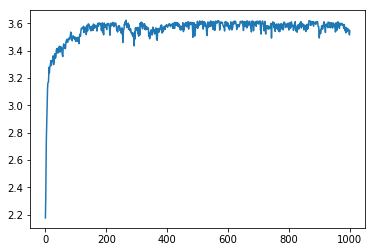

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import random
 
 
# (-1, 2)
# 初始化原始种群
def ori_popular(num):
    popular = []
    for i in range(num):
        x = random.uniform(-1, 2)  # 在此范围内生成一个随机浮点数
        popular.append(x)
    return popular
 
 
# 编码，也就是由表现型到基因型，性征到染色体
def encode(popular):  # popular应该是float类型的列表
    popular_gene = []
    for i in range(0, len(popular)):
        data = int((popular[i]-(-1)) / 3 * 2**18)  # 染色体序列为18bit
        bin_data = bin(data)  # 整形转换成二进制是以字符串的形式存在的
        for j in range(len(bin_data)-2, 18):  # 序列长度不足补0
            bin_data = bin_data[0:2] + '0' + bin_data[2:]
        popular_gene.append(bin_data)
    return popular_gene
 
 
# 解码，即适应度函数。通过基因，即染色体得到个体的适应度值
def decode(popular_gene):
    fitness = []
    for i in range(len(popular_gene)):
        x = (int(popular_gene[i], 2) / 2**18) * 3 - 1
        #print(x)
        value = x * np.sin(10 * np.pi * x) + 2
        fitness.append(value)
    return fitness
 
 
# 选择and交叉。选择用轮牌赌，交叉概率为0.66
def choice_ex(popular_gene):
    fitness = decode(popular_gene)
    sum_fit_value = 0
    for i in range(len(fitness)):
        sum_fit_value += fitness[i]
    # 各个个体被选择的概率
    probability = []
    for i in range(len(fitness)):
        probability.append(fitness[i]/sum_fit_value)
    # 概率分布
    probability_sum = []
    for i in range(len(fitness)):
        if i == 0:
            probability_sum.append(probability[i])
        else:
            probability_sum.append(probability_sum[i-1] + probability[i])
 
    # 选择
    popular_new = []
    for i in range(int(len(fitness)/2)):
        temp = []
        for j in range(2):
            rand = random.uniform(0, 1)  # 在0-1之间随机一个浮点数
            for k in range(len(fitness)):
                if k == 0:
                    if rand < probability_sum[k]:
                        temp.append(popular_gene[k])
                else:
                    if (rand > probability_sum[k-1]) and (rand < probability_sum[k]):
                        temp.append(popular_gene[k])
 
        #print(temp)
        # 交叉，交叉率为0.66。
        is_change = random.randint(0, 2)
        if is_change:
            temp_s = temp[0][9:15]
            temp[0] = temp[0][0:9] + temp[1][9:15] + temp[0][15:]
            temp[1] = temp[1][0:9] + temp_s + temp[1][15:]

        popular_new.append(temp[0])
        popular_new.append(temp[1])
    return popular_new
 
 
# 变异.概率为0.05
def variation(popular_new):
    for i in range(len(popular_new)):
        is_variation = random.uniform(0, 1)
        # print([len(k) for k in popular_new])
        if is_variation < 0.02:
            rand = random.randint(2, 19)
            if popular_new[i][rand] == '0':
                popular_new[i] = popular_new[i][0:rand] + '1' + popular_new[i][rand+1:]
            else:
                popular_new[i] = popular_new[i][0:rand] + '0' + popular_new[i][rand+1:]
    return popular_new
 
 
if __name__ == '__main__':  # alt+enter
    # 初始化原始种群, 一百个个体
    num = 100
    ori_popular = ori_popular(num)
    # 得到原始种群的基因
    ori_popular_gene = encode(ori_popular)  # 18位基因
    new_popular_gene = ori_popular_gene
    y = []
    for i in range(1000):  # 迭代次数。繁殖1000代
        new_popular_gene = choice_ex(new_popular_gene)  # 选择和交叉
        new_popular_gene = variation(new_popular_gene)  # 变异
        # 取当代所有个体适应度平均值
        new_fitness = decode(new_popular_gene)
        sum_new_fitness = 0
        for j in new_fitness:
            sum_new_fitness += j
        y.append(sum_new_fitness/len(new_fitness))
    
    # 画图
    x = np.linspace(0, 1000, 1000)
    fig = plt.figure()  # 相当于一个画板
    axis = fig.add_subplot(111)  # 坐标轴
    axis.plot(x, y)
    plt.show()